### Concrete data set

We have 1030 observations on 9 variables. We try to estimate the Complete compressive strength(CRS) using:

| Variable   | Description |
| ---------- | ---------------- |
| Cement in kg  | Cement in a m3 mixture | 
| Blast Furnace Slag in kg  | Blast Furnace Slag  in a m3 mixture | 
| Fly Ash in kg | Fly Ash in a m3 mixture | 
| Water in kg |  in a m3 mixture | 
| Superplasticizer in kg | Water in a m3 mixture | 
| Coarse Aggregate in kg  |Coarse Aggregate in a m3 mixture | 
| Fine Aggregate in kg  | Fine Aggregatein a m3 mixture | 
| Age in  Day  | Days (1-365) | 

In [1]:
import pandas                       as     pd
import numpy                        as     np
import scipy.stats                  as     stats

import seaborn                      as     sns
import matplotlib.pyplot            as     plt
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

import astropy.table                as     Table
import statsmodels.api              as     sm
import statsmodels.stats.api        as     sms
from   statsmodels.compat           import lzip

from   sklearn.cross_validation     import train_test_split
from   sklearn                      import model_selection

from sklearn.linear_model           import  LinearRegression
from sklearn.linear_model           import  Lasso
from sklearn.linear_model           import  Ridge
from sklearn.linear_model           import  ElasticNet

from   sklearn.tree                 import DecisionTreeRegressor
from   sklearn.ensemble             import RandomForestRegressor
from   sklearn.neural_network       import MLPRegressor
from   sklearn                      import ensemble
from   sklearn.ensemble             import GradientBoostingRegressor

from   sklearn.neighbors            import KNeighborsRegressor
from   sklearn.svm                  import SVR

from   sklearn.model_selection      import GridSearchCV
from   sklearn.model_selection      import cross_val_score, cross_val_predict


from   sklearn.metrics              import mean_squared_error, mean_absolute_error
from   statsmodels.compat           import lzip
from   statsmodels.stats            import diagnostic as diag

from  statsmodels.stats.outliers_influence import variance_inflation_factor

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def  report_rmse_mape(lm, y, X, title):
    
    '''
        Reports rmse and mape for the given model, pair of dataset (y and X) and title
    ''' 
    rmse_     = (np.sqrt(mean_squared_error(y_true = y, y_pred = lm.predict(X))))
    mape_    = mean_absolute_percentage_error(y,       y_pred = lm.predict(X))
    print("\n")
    print(title)
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse_ ))
    print('MAPE is {}'.format(mape_))

#### End


In [4]:
url = 'https://sites.google.com/site/pocketecoworld/Concrete_Data.csv'

In [5]:
cement_df       = pd.read_csv(url)
print(cement_df.shape)
print(cement_df.head().T)   

(1030, 9)
                        0        1       2       3      4
Cement             540.00   540.00  332.50  332.50  198.6
Blast                0.00     0.00  142.50  142.50  132.4
Fly Ash              0.00     0.00    0.00    0.00    0.0
Water              162.00   162.00  228.00  228.00  192.0
Superplasticizer     2.50     2.50    0.00    0.00    0.0
CA                1040.00  1055.00  932.00  932.00  978.4
FA                 676.00   676.00  594.00  594.00  825.5
Age                 28.00    28.00  270.00  365.00  360.0
CMS                 79.99    61.89   40.27   41.05   44.3


In [6]:
print(cement_df.columns)

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')


In [7]:
cement_df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [8]:
cement_df.var()

Cement              10921.580220
Blast                7444.124812
Fly Ash              4095.616541
Water                 456.002651
Superplasticizer       35.686781
CA                   6045.677357
FA                   6428.187792
Age                  3990.437729
CMS                   279.081814
dtype: float64

In [9]:
X = cement_df.iloc[:,0:8] # Select all columns other than column, CMS
y = cement_df.iloc[:,8:] # Select only CMS

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) 

In [11]:
df_names      = ['x_train shape', 'x_test shape', 'y_train shape', 'y_test shape']
shapes        = (X_train.shape, X_test.shape,  y_train.shape, y_test.shape)
types         = (type(X_train), type(X_test), type(y_train),type(y_test))
lzip(df_names,shapes, types)

[('x_train shape', (824, 8), pandas.core.frame.DataFrame),
 ('x_test shape', (206, 8), pandas.core.frame.DataFrame),
 ('y_train shape', (824, 1), pandas.core.frame.DataFrame),
 ('y_test shape', (206, 1), pandas.core.frame.DataFrame)]

### Test the assumptions of Linear Regression

##### To test the assumptions, run a linear regression using statsmodels: 

It is to be noted that statsmodels does not add intercept term automatically thus we need to create an intercept to our model.

In [12]:
X_         = sm.add_constant(X_train) 
## Add an intercept (beta_0) to our model

#### Linear regression can be run by using sm.OLS:

In [13]:
lm = sm.OLS(y_train, X_).fit()
## The summary of our model can be obtained via:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     161.0
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          4.37e-162
Time:                        09:09:23   Log-Likelihood:                -3090.4
No. Observations:                 824   AIC:                             6199.
Df Residuals:                     815   BIC:                             6241.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.2735     29.931     -1.145      0.253     -93.025      24.478
Cement               0.1242      0.010     13.054      0.000       0.105       0.143
Blast                0.1037      0.011      9.229      0.000       0.082       0.126
Fly Ash              0.0934      0.014      6.687      0.000       0.066       0.121
Water               -0.1343      0.046     -2.947      0.003      -0.224      -0.045
Superplasticizer     0.2880      0.102      2.810      0.005       0.087       0.489
CA                   0.0207      0.011      1.966      0.050    2.79e-05       0.041
FA                   0.0256      0.012      2.131      0.033       0.002       0.049
Age                  0.1146      0.006     19.064      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.757   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.762
Skew:                          -0.165   Prob(JB):                        0.152
Kurtosis:                       2.974   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y_pred = lm.predict(X_) 

### 1) No Outliers

#### Detecting Outliers: 

Firstly we try to get the studentized residuals using get_influence( ). The studentized residuals are saved in resid_student.

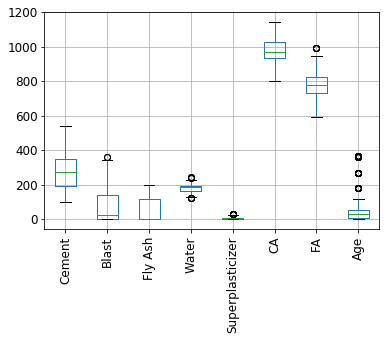

In [15]:
X.boxplot(rot = 90)
plt.show()

In [16]:
influence       = lm.get_influence()  
resid_student   = influence.resid_studentized_external

In [17]:
residuals_s     = pd.concat([X, pd.Series(resid_student, \
                            name = "Studentized Residuals")],axis = 1)
residuals_s.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,Studentized Residuals
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1.559672
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,-0.917354
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1.057443
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.637504
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,-1.170290


Remove any observation, if the absolute value of studentized residuals is more than 3.

We try to create a logical vector for the absolute studentized residuals more than 3

In [18]:
ind = residuals_s.loc[np.absolute(residuals_s["Studentized Residuals"]) > 3,:].index
ind

Int64Index([649], dtype='int64')

In [19]:
y_train.drop(ind, axis = 0,inplace = True)
X_.drop(ind, axis = 0,inplace = True)  #Interept column is not there

D:\Python\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
print(len(X_))

823


### 2) Normality of the residuals

#### We use Jarque-Bera test  from scipy library to check the normality of residuals.

#### Null Hypothesis: The residuals are normally distributed.

####  Alternative Hypothesis: The residuals are not normally distributed.

In [21]:
lm      = sm.OLS(y_train, X_).fit()
## The summary of our model can be obtained via:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          9.09e-162
Time:                        09:09:24   Log-Likelihood:                -3085.9
No. Observations:                 823   AIC:                             6190.
Df Residuals:                     814   BIC:                             6232.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0406     29.904     -1.138      0.255     -92.738      24.657
Cement               0.1240      0.010     13.044      0.000       0.105       0.143
Blast                0.1040      0.011      9.266      0.000       0.082       0.126
Fly Ash              0.0932      0.014      6.681      0.000       0.066       0.121
Water               -0.1343      0.046     -2.950      0.003      -0.224      -0.045
Superplasticizer     0.2853      0.102      2.786      0.005       0.084       0.486
CA                   0.0207      0.011      1.968      0.049    5.09e-05       0.041
FA                   0.0254      0.012      2.117      0.035       0.002       0.049
Age                  0.1143      0.006     19.021      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.793   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.793
Skew:                          -0.166   Prob(JB):                        0.150
Kurtosis:                       2.978   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
jb_stat, jb_pval = stats.jarque_bera(lm.resid)
print('Jarque-Bera test P value is %1.4f' % jb_pval)

Jarque-Bera test P value is 0.1501


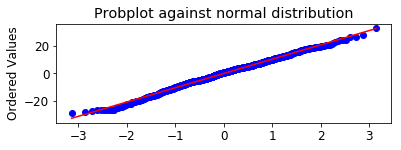

In [23]:
fig     = plt.figure()
ax1     = fig.add_subplot(211)
prob    = stats.probplot(lm.resid, dist = stats.norm, plot = ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
plt.show()

Our p value is 0.1501 > 0.05. At 5% level of significance, we accept the null hypothesis and conclude that the residuals are normally distributed.

### 3) No multi-collinearity

##### Detecting and Removing Multicollinearity 

We use the statsmodels library to calculate VIF from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
[variance_inflation_factor(X_.values, j) for j in range(X_.shape[1])]### 

[6882.15686147909,
 7.649851425544104,
 7.200884996866033,
 6.096324404236058,
 7.181329826681238,
 2.9382672538697547,
 5.046538030576595,
 7.007399828726609,
 1.103492071785564]

We create a function to remove the collinear variables. 

We choose a threshold of 5 which means if VIF is more than 5 for a particular variable then that variable will be removed.

In [25]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [26]:
X_out  = calculate_vif(X_) 
X_out.head()

Iteration no.
1
[6882.15686147909, 7.649851425544104, 7.200884996866033, 6.096324404236058, 7.181329826681238, 2.9382672538697547, 5.046538030576595, 7.007399828726609, 1.103492071785564]
Max VIF is for variable no.:
0
Iteration no.
2
[15.47758260195686, 3.2696650121931814, 4.129325501299342, 82.21008475163109, 5.21853674386234, 85.86694548901554, 71.81633694293068, 1.686160096846766]
Max VIF is for variable no.:
5
Iteration no.
3
[14.517486362670928, 3.2477734890453647, 3.968695653417151, 71.53530428408644, 5.1775267752249094, 48.27016091702854, 1.6861256310510393]
Max VIF is for variable no.:
3
Iteration no.
4
[9.385732352700492, 2.082876994657241, 3.00951685248508, 2.910827525646028, 14.418586504418238, 1.572151969798833]
Max VIF is for variable no.:
4
Iteration no.
5
[2.6936535297265767, 1.528289203660763, 1.904439437889966, 2.8907052492126315, 1.5380724272424997]
Max VIF is for variable no.:
3


,Cement,Blast,Fly Ash,Superplasticizer,Age
337,275.1,0.0,121.4,9.9,56
384,516.0,0.0,0.0,8.2,28
805,393.0,0.0,0.0,0.0,90
682,183.9,122.6,0.0,0.0,28
329,246.8,0.0,125.1,12.0,3


### 4) No autocorrelation

 To ensure the absence of autocorrelation we use Ljungbox test.

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

####  Null Hypothesis: Autocorrelation is absent.
#### Alternative Hypothesis: Autocorrelation is present.

In [27]:
diag.acorr_ljungbox(lm.resid, lags = 1) 

(array([0.35464613]), array([0.55149478]))

### 5) heteroscedasticity

Use Goldfeld Quandt to test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [28]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
lzip(name, test)

[('F statistic', 1.0829551979591017), ('p-value', 0.21218162322195405)]

The p-value is 0.2122; So, the assumption of homoscedasticity.   
hence we can say that the residuals have constant variance. Hence we can say that all the assumptions of our linear regression model are satisfied.

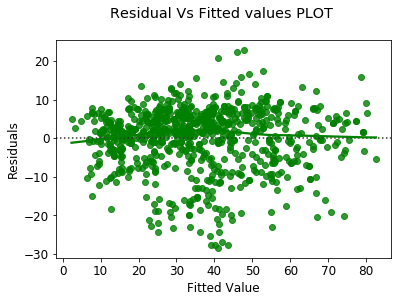

In [29]:
y          = y_train['CMS']
residuals  =  lm.resid
# Plot the residuals after fitting a linear model
ax         = sns.residplot(y, residuals, lowess = True, color = "g")

ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

In [40]:
train_df         = X_
train_df['CMS']  = y_train 

In [41]:
test_df          =  X_test
test_df['CMS']   =  y_test

In [42]:
train_df.to_csv('train.csv', index = False)   
test_df.to_csv('test.csv', index = False)   

### Performance of the model evaluation

In [30]:
lm_ols              =   LinearRegression

### Prediction Accuracy

Prediction error or residuals is the difference between the predicted target variable values and the actual target variable vaues.

Most popular measure to evaluate the model performance is Root Mean Square Error (RMSE) which is the arithmatic mean of the sum of the residuals.
The model with low RMSE is the best model among many other models.

In [31]:
seed                  =   12345
X                     = X_test[['Cement','Blast','Fly Ash','Superplasticizer','Age']]
y                     = y_test['CMS']

lm_OLS                = LinearRegression ()

In [32]:
lm_OLS.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print('\OLS Multiple Linear Regression Models\n')
print("R Square value for Ridge Regression complete data %4.2f" % np.round(lm_OLS.score(X, y) * 100, 2))

\OLS Multiple Linear Regression Models

R Square value for Ridge Regression complete data 60.02


In [34]:
report_rmse_mape(lm_OLS, y, X, 'The model performance for training set - \nOLS regression')



The model performance for training set - 
OLS regression
--------------------------------------
RMSE is 10.947967141852256
MAPE is 34.416990999499724


In [35]:
lm_ridge              =   Ridge()
lm_lasso              =   Lasso()
lm_elastic            =   ElasticNet()
lm_elastic            =   ElasticNet()

### Non linear models

kfold                 =   model_selection.KFold(n_splits = 10, random_state = seed)
lm_CART               =   DecisionTreeRegressor()
lm_RF                 =   RandomForestRegressor(random_state = seed)
lm_ANN                =   MLPRegressor(alpha=0.000001, activation = 'tanh', random_state = seed, tol = 0.001)
lm_GB                 =   ensemble.GradientBoostingRegressor()
lm_SVR                =   SVR(kernel='linear', C=1.0, epsilon=0.2, )
lm_KNN                =   KNeighborsRegressor()


lm_ridge.fit(X, y)
lm_lasso.fit(X, y)
lm_elastic.fit(X, y) 
lm_CART.fit(X, y) 
lm_RF.fit(X, y)
lm_GB.fit(X, y)
lm_SVR.fit(X, y)  
lm_KNN.fit(X, y)  
lm_ANN.fit(X, y)

D:\Python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
print('\nOther Linear Models\n')

print("R Square value for Ridge Regression complete data %4.2f" % np.round(lm_ridge.score(X, y) * 100, 2))
print("R Square value for Lasso Regression complete data %4.2f"  %np.round(lm_lasso.score(X, y) * 100, 2))
print("R Square value for Elastic Net Regression complete data %4.2f" % np.round(lm_elastic.score(X,y) * 100, 2))

print('\nNon linear Models\n')
print("R Square value for CART Regression complete data %4.2f" % np.round(lm_CART.score(X,y) * 100, 2))
print("R Square value for Random Forest Regression complete data %4.2f" % np.round(lm_RF.score(X,y) * 100, 2))
print("R Square value for Artificial Neural Network Regression complete data %4.2f" % np.round(lm_ANN.score(X,y) * 100, 2))

print("R Square value for Gradient Boosting Regression complete data %4.2f" % np.round(lm_GB.score(X,y) * 100, 2))
print("R Square value for SVR Regression complete data %4.2f" % np.round(lm_SVR.score(X,y) * 100, 2))
print("R Square value for KNN Regression complete data %4.2f" % np.round(lm_KNN.score(X,y) * 100, 2))


Other Linear Models

R Square value for Ridge Regression complete data 60.02
R Square value for Lasso Regression complete data 60.01
R Square value for Elastic Net Regression complete data 60.01

Non linear Models

R Square value for CART Regression complete data 99.12
R Square value for Random Forest Regression complete data 95.29
R Square value for Artificial Neural Network Regression complete data -3.39
R Square value for Gradient Boosting Regression complete data 96.23
R Square value for SVR Regression complete data 51.40
R Square value for KNN Regression complete data 74.57


In [37]:
print('\nOther Linear Models\n')

report_rmse_mape(lm_ridge, y, X, 'The model performance for training set - \nRidge regression')
report_rmse_mape(lm_lasso, y, X, 'The model performance for training set - \nLasso regression')
report_rmse_mape(lm_elastic, y, X, 'The model performance for training set - \nElsasticnet regression')

print('\nOther Non Linear Models\n')

report_rmse_mape(lm_CART, y, X, 'The model performance for training set - \nCART regression')
report_rmse_mape(lm_RF, y, X,   'The model performance for training set - \nRandom forest regression')
report_rmse_mape(lm_GB, y, X,   'The model performance for training set - \nGradient Boosting regression')
report_rmse_mape(lm_SVR, y, X,  'The model performance for training set - \nSVR regression')
report_rmse_mape(lm_KNN, y, X,  'The model performance for training set - \nKNN regression')
report_rmse_mape(lm_ANN, y, X,  'The model performance for training set - \nNeural Network regression')


Other Linear Models



The model performance for training set - 
Ridge regression
--------------------------------------
RMSE is 10.947967181735434
MAPE is 34.4173516413125


The model performance for training set - 
Lasso regression
--------------------------------------
RMSE is 10.949808509578846
MAPE is 34.53707331188962


The model performance for training set - 
Elsasticnet regression
--------------------------------------
RMSE is 10.949637955577247
MAPE is 34.51257522309826

Other Non Linear Models



The model performance for training set - 
CART regression
--------------------------------------
RMSE is 1.6262951522802056
MAPE is 0.5188210666745484


The model performance for training set - 
Random forest regression
--------------------------------------
RMSE is 3.757400045000017
MAPE is 8.520191518313153


The model performance for training set - 
Gradient Boosting regression
--------------------------------------
RMSE is 3.364149569647691
MAPE is 8.555465374194506


The model

In [38]:
### For testing dataset
seed                  =   12345
X                     =   X_test[['Cement','Blast','Fly Ash','Superplasticizer','Age']]
y                     =   y_test['CMS']

In [39]:
print('\nOther Linear Models\n')

report_rmse_mape(lm_ridge, y, X, 'The model performance for testing set - \nRidge regression')
report_rmse_mape(lm_lasso, y, X, 'The model performance for testing set - \nLasso regression')
report_rmse_mape(lm_elastic, y, X, 'The model performance for testing set - \nElsasticnet regression')

print('\nOther Non Linear Models\n')

report_rmse_mape(lm_CART, y, X, 'The model performance for testing set - \nCART regression')
report_rmse_mape(lm_RF, y, X,   'The model performance for testing set - \nRandom forest regression')
report_rmse_mape(lm_GB, y, X,   'The model performance for testing set - \nGradient Boosting regression')
report_rmse_mape(lm_SVR, y, X,  'The model performance for testing set - \nSVR regression')
report_rmse_mape(lm_KNN, y, X,  'The model performance for testing set - \nKNN regression')
report_rmse_mape(lm_ANN, y, X,  'The model performance for testing set - \nNeural Network regression')


Other Linear Models



The model performance for testing set - 
Ridge regression
--------------------------------------
RMSE is 10.947967181735434
MAPE is 34.4173516413125


The model performance for testing set - 
Lasso regression
--------------------------------------
RMSE is 10.949808509578846
MAPE is 34.53707331188962


The model performance for testing set - 
Elsasticnet regression
--------------------------------------
RMSE is 10.949637955577247
MAPE is 34.51257522309826

Other Non Linear Models



The model performance for testing set - 
CART regression
--------------------------------------
RMSE is 1.6262951522802056
MAPE is 0.5188210666745484


The model performance for testing set - 
Random forest regression
--------------------------------------
RMSE is 3.757400045000017
MAPE is 8.520191518313153


The model performance for testing set - 
Gradient Boosting regression
--------------------------------------
RMSE is 3.364149569647691
MAPE is 8.555465374194506


The model perfo